In [55]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten, Dropout

In [56]:
mnist = keras.datasets.mnist
#from keras.datasets import mnist

In [57]:
(x_train_full, y_train_full),(x_test, y_test) = mnist.load_data()
print(x_train_full.shape)

(60000, 28, 28)


In [58]:
print("x_train_full", x_train_full.shape)
print("y_train_full", y_train_full.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train_full (60000, 28, 28)
y_train_full (60000,)
x_test (10000, 28, 28)
y_test (10000,)


5


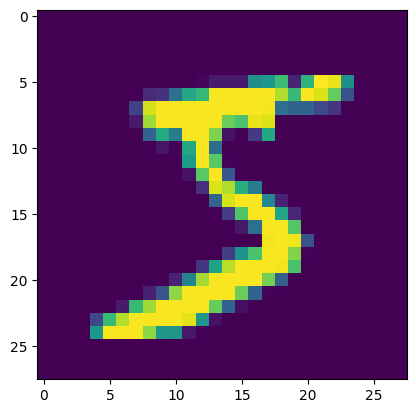

In [59]:
#show first train and test image
plt.imshow(x_train_full[0])
print(y_train_full[0])

7


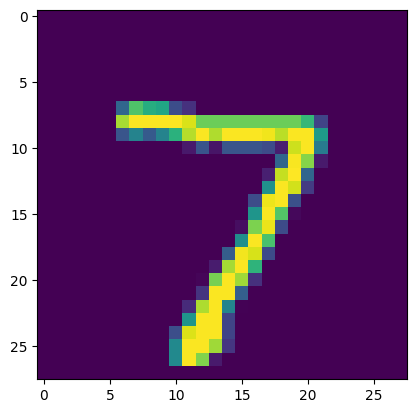

In [60]:
plt.imshow(x_test[0])
print(y_test[0])

In [61]:
#find the number of train data and test data?
len(x_train_full)


60000

In [62]:
len(y_train_full)

60000

In [63]:
len(x_test)

10000

In [64]:
len(y_test)

10000

In [65]:
#print the first train data
print(x_train_full[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [66]:
#find dimension of train and test data
print(x_train_full.shape)
print(y_train_full.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [67]:
#normalising
x_train_norm = x_train_full/255.
x_test_norm = x_test/255.
print(x_train_norm.shape)
print(x_test_norm.shape)


(60000, 28, 28)
(10000, 28, 28)


In [68]:
print(x_train_norm[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [69]:
# print(X_train.shape)
# print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [70]:
# X_train = x_train_norm.reshape(-1,28,28,1)   
# X_test = x_test_norm.reshape(-1,28,28,1)
# print(X_train.shape)
# print(X_test.shape)
#-1 no of datas
#28 pixels row and cols
# 1 channels
#cnn in 4 dimension

In [71]:
y_train_full[0]

5

In [72]:
# Find the unique numbers from the train labels
classes = np.unique(y_train_full)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [73]:
x_valid, x_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
#

In [74]:
# Building model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) #kernal(filter_intializer for activation)
model.add(Dropout(0.25)) #25% of neurons are removed from the model
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform')) #filter(3,3)
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten()) # flatting the output from the intput layer
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))#100 - no of neurons ,classification layer 
model.add(Dense(10, activation='softmax'))



In [75]:
model.summary() #32 times filter convaluted

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 dropout_2 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                      

In [76]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]) #sgd gradient descent algo

In [77]:
model_history = model.fit(x_train,y_train,epochs=3,validation_data=(x_valid,y_valid),batch_size=20) # batch size 20 img

Epoch 1/3
   6/2750 [..............................] - ETA: 27s - loss: 2.2944 - accuracy: 0.2167  

2023-01-07 17:07:48.343221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2747/2750 [============================>.] - ETA: 0s - loss: 0.2663 - accuracy: 0.9185

2023-01-07 17:08:16.935826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2750/2750 [==============================] - 30s 11ms/step - loss: 0.2662 - accuracy: 0.9185 - val_loss: 0.1177 - val_accuracy: 0.9696
Epoch 2/3
2750/2750 [==============================] - 28s 10ms/step - loss: 0.1067 - accuracy: 0.9679 - val_loss: 0.0793 - val_accuracy: 0.9788
Epoch 3/3
2750/2750 [==============================] - 28s 10ms/step - loss: 0.0761 - accuracy: 0.9767 - val_loss: 0.0667 - val_accuracy: 0.9800


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


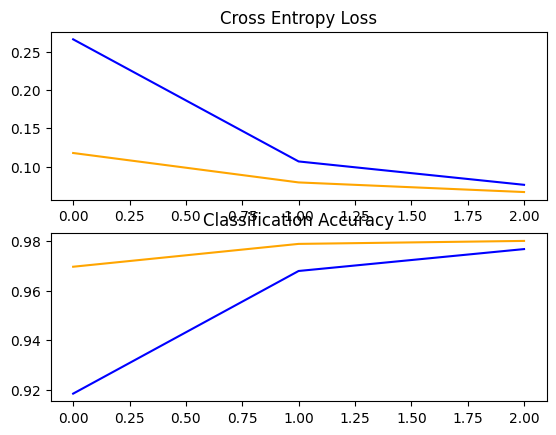

In [78]:
# plot loss
print(model_history.history.keys())
history_dict= model_history.history
plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history_dict['loss'], color='blue', label='train')
plt.plot(history_dict['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(history_dict['accuracy'], color='blue', label='train')
plt.plot(history_dict['val_accuracy'], color='orange', label='test')
plt.show()

In [79]:
model.evaluate(x_test, y_test)

  1/313 [..............................] - ETA: 1:01 - loss: 0.0000e+00 - accuracy: 1.0000

2023-01-07 17:09:14.746163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 7.4358 - accuracy: 0.9819


[7.435828685760498, 0.9819000363349915]

In [80]:
from sklearn.model_selection import KFold
kfold = KFold(5, shuffle=True, random_state=1)
	# enumerate splits
for train_ix, test_ix in kfold.split(x_train):
  #define model
  model = Sequential()
  model.add(Conv2D(32,(3, 3),activation='relu',kernel_initializer='he_uniform',input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
	# select rows for train and test
  trainX, trainY, testX, testY = x_train[train_ix], y_train[train_ix], x_train[test_ix], y_train[test_ix]
	# fit model
  history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
	# evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
	
		

2023-01-07 17:09:18.868031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-07 17:09:27.155175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 